In [ ]:
pip install datasets

  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
   ---------------------------------------- 0.0/27.5 MB ? eta -:--:--
   ------ --------------------------------- 4.5/27.5 MB 22.3 MB/s eta 0:00:02
   ------------ --------------------------- 8.7/27.5 MB 20.7 MB/s eta 0:00:01
   ------------------- -------------------- 13.6/27.5 MB 21.4 MB/s eta 0:00:01
   -------------------------- ------------- 18.4/27.5 MB 21.4 MB/s eta 0:00:01
   --------------------------------- ------ 22.8/27.5 MB 21.2 MB/s eta 0:00:01
   ---------------------------------------  27.5/27.5 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 27.5/27.5 MB 19.6 MB/s eta 0:00:00
Using cached requests-2.32.5-py3-none-any.whl (64 kB)

  Attempting uninstall: requests

    Found existing installation: requests 2.31.0

    Uninstalling requests-2.31.0:

      Successfully uninstalle

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.18 requires numpy>=2.0.2, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [ ]:
from datasets import load_dataset

ds = load_dataset("DataForGood/ome-hackathon-season-14")

In [10]:
df = pd.DataFrame(ds['train'])
df.head()

,channel_title,channel_name,country,segment_id,segment_start,segment_end,duration_seconds,num_keywords,avg_density,themes,report_text,category,secondary_categories,text_type
0,France 2,france2,france,2732,2025-06-19 07:06:11.061 +0200,2025-06-19 07:07:25.070 +0200,74,9,8.1,"attenuation_climatique_solutions, biodiversite...",ne parviennent pas à toutes les évacuer ces al...,other,[],segment
1,TF1,tf1,france,3973,2025-10-08 20:18:42.012 +0200,2025-10-08 20:19:46.044 +0200,64,12,11.0,"biodiversite_causes, biodiversite_concepts_gen...",plus important était réalisée il faut souligne...,mobility_transport,[],segment
2,France 2,france2,france,5788,2025-12-03 06:34:04.031 +0100,2025-12-03 06:36:02.025 +0100,118,18,13.4,", attenuation_climatique_solutions_indirectes,...",plus vendu au monde a la une également cette c...,agriculture_alimentation,[energy],segment
3,M6,m6,france,3445,2025-11-17 15:20:24.048 +0100,2025-11-17 15:21:26.064 +0100,62,4,5.3,", biodiversite_causes_indirectes, changement_c...",christo popov thomas fersen ces enseignants et...,agriculture_alimentation,[],segment
4,TF1,tf1,france,354,2025-01-30 08:44:59.024 +0100,2025-01-30 08:46:29.034 +0100,90,9,8.1,"attenuation_climatique_solutions, biodiversite...",ce sont nos confrères du figaro qui nous en pa...,other,[],report


In [11]:
df.info

<bound method DataFrame.info of      channel_title channel_name country  segment_id  \
0         France 2      france2  france        2732   
1              TF1          tf1  france        3973   
2         France 2      france2  france        5788   
3               M6           m6  france        3445   
4              TF1          tf1  france         354   
...            ...          ...     ...         ...   
8344      France 2      france2  france        3614   
8345           TF1          tf1  france        4712   
8346      France 2      france2  france        2126   
8347  France 3-idf      fr3-idf  france         778   
8348      France 2      france2  france        5205   

                      segment_start                    segment_end  \
0     2025-06-19 07:06:11.061 +0200  2025-06-19 07:07:25.070 +0200   
1     2025-10-08 20:18:42.012 +0200  2025-10-08 20:19:46.044 +0200   
2     2025-12-03 06:34:04.031 +0100  2025-12-03 06:36:02.025 +0100   
3     2025-11-17 15:20:24.0

In [ ]:
skim(df)

In [15]:
df['themes']

0       attenuation_climatique_solutions, biodiversite...
1       biodiversite_causes, biodiversite_concepts_gen...
2       , attenuation_climatique_solutions_indirectes,...
3       , biodiversite_causes_indirectes, changement_c...
4       attenuation_climatique_solutions, biodiversite...
                              ...                        
8344    attenuation_climatique_solutions, biodiversite...
8345    , biodiversite_concepts_generaux_indirectes, c...
8346    attenuation_climatique_solutions_indirectes, b...
8347    adaptation_climatique_solutions, attenuation_c...
8348    biodiversite_causes_indirectes, biodiversite_c...
Name: themes, Length: 8349, dtype: object

In [21]:
# Toutes les valeurs uniques de category
print("Catégories uniques:")
print(df['category'].unique())
print(f"\nNombre de catégories uniques: {df['category'].nunique()}")
print("\nDistribution des catégories:")
print(df['category'].value_counts())

Catégories uniques:
['other' 'mobility_transport' 'agriculture_alimentation' 'energy']

Nombre de catégories uniques: 4

Distribution des catégories:
category
other                       2903
agriculture_alimentation    2565
mobility_transport          1727
energy                      1154
Name: count, dtype: int64


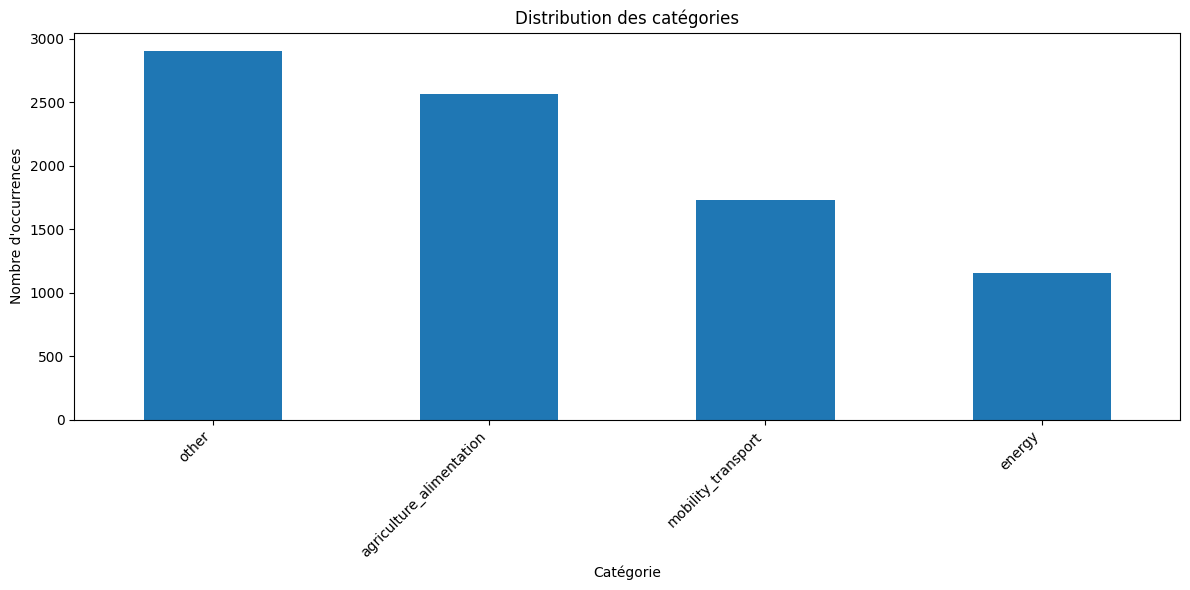

In [22]:
# Visualisation de la distribution des catégories
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Distribution des catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Filtrer le dataset sur la catégorie agriculture_alimentation
df_agri = df[df['category'] == 'agriculture_alimentation']
print(f"Nombre d'observations dans la catégorie agriculture_alimentation: {len(df_agriculture)}")
print(f"\nPourcentage du dataset total: {len(df_agri)/len(df)*100:.2f}%")
print(f"\nAperçu des données filtrées:")
df_agri.head(10)

Nombre d'observations dans la catégorie agriculture_alimentation: 2565

Pourcentage du dataset total: 30.72%

Aperçu des données filtrées:


,channel_title,channel_name,country,segment_id,segment_start,segment_end,duration_seconds,num_keywords,avg_density,themes,report_text,category,secondary_categories,text_type
2,France 2,france2,france,5788,2025-12-03 06:34:04.031 +0100,2025-12-03 06:36:02.025 +0100,118,18,13.4,", attenuation_climatique_solutions_indirectes,...",plus vendu au monde a la une également cette c...,agriculture_alimentation,[energy],segment
3,M6,m6,france,3445,2025-11-17 15:20:24.048 +0100,2025-11-17 15:21:26.064 +0100,62,4,5.3,", biodiversite_causes_indirectes, changement_c...",christo popov thomas fersen ces enseignants et...,agriculture_alimentation,[],segment
9,M6,m6,france,1379,2025-05-13 20:14:11.059 +0200,2025-05-13 20:15:50.004 +0200,99,8,8.1,"attenuation_climatique_solutions_indirectes, b...",la baignade tourne court sera <unk> occasion d...,agriculture_alimentation,[],segment
14,TF1,tf1,france,4852,2025-12-25 09:11:59.056 +0100,2025-12-25 09:13:11.082 +0100,72,15,17.2,"adaptation_climatique_solutions, attenuation_c...",le jardin ce ne sont pas uniquement des matièr...,agriculture_alimentation,[],segment
17,France 2,france2,france,5744,2025-11-30 07:36:06.090 +0100,2025-11-30 07:38:37.058 +0100,151,11,10.5,"biodiversite_causes, biodiversite_concepts_gen...",aux etats-unis que pensez-vous d' aller faire ...,agriculture_alimentation,[],segment
20,France 2,france2,france,2000,2025-05-07 06:42:01.096 +0200,2025-05-07 06:44:57.032 +0200,176,22,16.0,", adaptation_climatique_solutions_indirectes, ...",l' après-midi sur la moitié sud du pays côté t...,agriculture_alimentation,[],report
21,M6,m6,france,3667,2025-12-09 13:18:27.001 +0100,2025-12-09 13:19:43.024 +0100,76,16,23.6,", adaptation_climatique_solutions_indirectes, ...",premier long métrage sans son compère gustave ...,agriculture_alimentation,[mobility_transport],segment
23,France 3-idf,fr3-idf,france,3499,2025-12-31 12:10:01.042 +0100,2025-12-31 12:11:44.095 +0100,103,11,14.2,", biodiversite_concepts_generaux_indirectes, c...",quatorze et quinze degrés assurance bertrand l...,agriculture_alimentation,[],segment
24,M6,m6,france,830,2025-03-21 20:08:42.054 +0100,2025-03-21 20:11:03.066 +0100,141,32,23.3,", attenuation_climatique_solutions, biodiversi...",mais encore faut-il le savoir moi dans mon cer...,agriculture_alimentation,[energy],segment
28,TF1,tf1,france,1228,2025-04-10 08:32:11.013 +0200,2025-04-10 08:33:14.007 +0200,63,4,4.3,", biodiversite_concepts_generaux_indirectes, c...",poupon julia scher sur place ça c' est un de n...,agriculture_alimentation,[],report


## Analyse des thèmes

In [25]:
# Analyse des thèmes
print("Exemple de thèmes:")
print(df_agri['themes'].head(10))
print(f"\nNombre total de thèmes uniques: {df['themes'].nunique()}")

Exemple de thèmes:
2     , attenuation_climatique_solutions_indirectes,...
3     , biodiversite_causes_indirectes, changement_c...
9     attenuation_climatique_solutions_indirectes, b...
14    adaptation_climatique_solutions, attenuation_c...
17    biodiversite_causes, biodiversite_concepts_gen...
20    , adaptation_climatique_solutions_indirectes, ...
21    , adaptation_climatique_solutions_indirectes, ...
23    , biodiversite_concepts_generaux_indirectes, c...
24    , attenuation_climatique_solutions, biodiversi...
28    , biodiversite_concepts_generaux_indirectes, c...
Name: themes, dtype: object

Nombre total de thèmes uniques: 6297


## Statistiques descriptives

In [26]:
# Informations générales sur le dataset
print(f"Nombre total d'observations: {len(df_agri)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print(f"\nNom des colonnes:")
print(df.columns.tolist())
print(f"\nTypes de données:")
print(df.dtypes)
print(f"\nValeurs manquantes:")
print(df.isnull().sum())

Nombre total d'observations: 2565
Nombre de colonnes: 14

Nom des colonnes:
['channel_title', 'channel_name', 'country', 'segment_id', 'segment_start', 'segment_end', 'duration_seconds', 'num_keywords', 'avg_density', 'themes', 'report_text', 'category', 'secondary_categories', 'text_type']

Types de données:
channel_title            object
channel_name             object
country                  object
segment_id                int64
segment_start            object
segment_end              object
duration_seconds          int64
num_keywords              int64
avg_density             float64
themes                   object
report_text              object
category                 object
secondary_categories     object
text_type                object
dtype: object

Valeurs manquantes:
channel_title           0
channel_name            0
country                 0
segment_id              0
segment_start           0
segment_end             0
duration_seconds        0
num_keywords            